In [1]:
# libraries 코드를 import 시키기 위한 코드
import sys
sys.path.append("../libraries/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import koreanize_matplotlib
# from libraries.aws_to_df import aws_to_df

%matplotlib inline

In [3]:
# from libraries.aws_to_df import aws_to_df
# drama_df = aws_to_df()


In [4]:
# rank >= 10000인 드라마

drama_df = pd.read_excel("../data/drama_df_in_rank_2023-09-14_ver_7.xlsx", index_col=0)
drama_df.head()

,drama_id,drama_name,kor_name,year,director,screenwriter,country,type,tot_eps,duration,...,aired_on,org_net,content_rt,synopsis,rank,pop,genres,watchers,score,evaluators
1,49231,Move to Heaven,무브 투 헤븐,2021,['Kim Sung Ho'],['Yoon Ji Ryun'],South Korea,Drama,10,3120,...,Friday,[Netflix],18+ Restricted (violence & profanity),Han Geu Roo is an autistic 20-year-old. He wor...,11,83,"Life, Drama",75895,9.2,38142
2,702267,Weak Hero Class 1,약한영웅 Class 1,2022,['You Su Min'],['You Su Min'],South Korea,Drama,8,2400,...,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,158,"Action, Youth, Drama",52416,9.1,26474
3,57173,Hospital Playlist Season 2,슬기로운 의사생활++,2021,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,6000,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,17,154,"Romance, Life, Drama, Medical",52683,9.1,25263
4,54625,Flower of Evil,악의 꽃,2020,"['Kim Chul Gyu','Yoon Jong Ho']",['Yoo Jung Hee'],South Korea,Drama,16,4200,...,"Wednesday, Thursday",[tvN],15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,21,28,"Thriller, Romance, Crime, Melodrama",108058,9.1,51352
5,36269,Hospital Playlist,슬기로운 의사 생활,2020,['Shin Won Ho'],['Lee Woo Jung'],South Korea,Drama,12,5400,...,Thursday,"[Netflix, tvN]",15+ - Teens 15 or older,The stories of people going through their days...,24,49,"Romance, Life, Drama, Medical",90332,9.1,41141


In [5]:
drama_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 1 to 1509
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drama_id      1177 non-null   int64  
 1   drama_name    1177 non-null   object 
 2   kor_name      1177 non-null   object 
 3   year          1177 non-null   int64  
 4   director      1177 non-null   object 
 5   screenwriter  1177 non-null   object 
 6   country       1177 non-null   object 
 7   type          1177 non-null   object 
 8   tot_eps       1177 non-null   int64  
 9   duration      1177 non-null   int64  
 10  start_dt      1177 non-null   object 
 11  end_dt        1089 non-null   object 
 12  aired_on      1119 non-null   object 
 13  org_net       1047 non-null   object 
 14  content_rt    1177 non-null   object 
 15  synopsis      1175 non-null   object 
 16  rank          1177 non-null   int64  
 17  pop           1177 non-null   int64  
 18  genres        1177 non-null   obj

<Axes: >

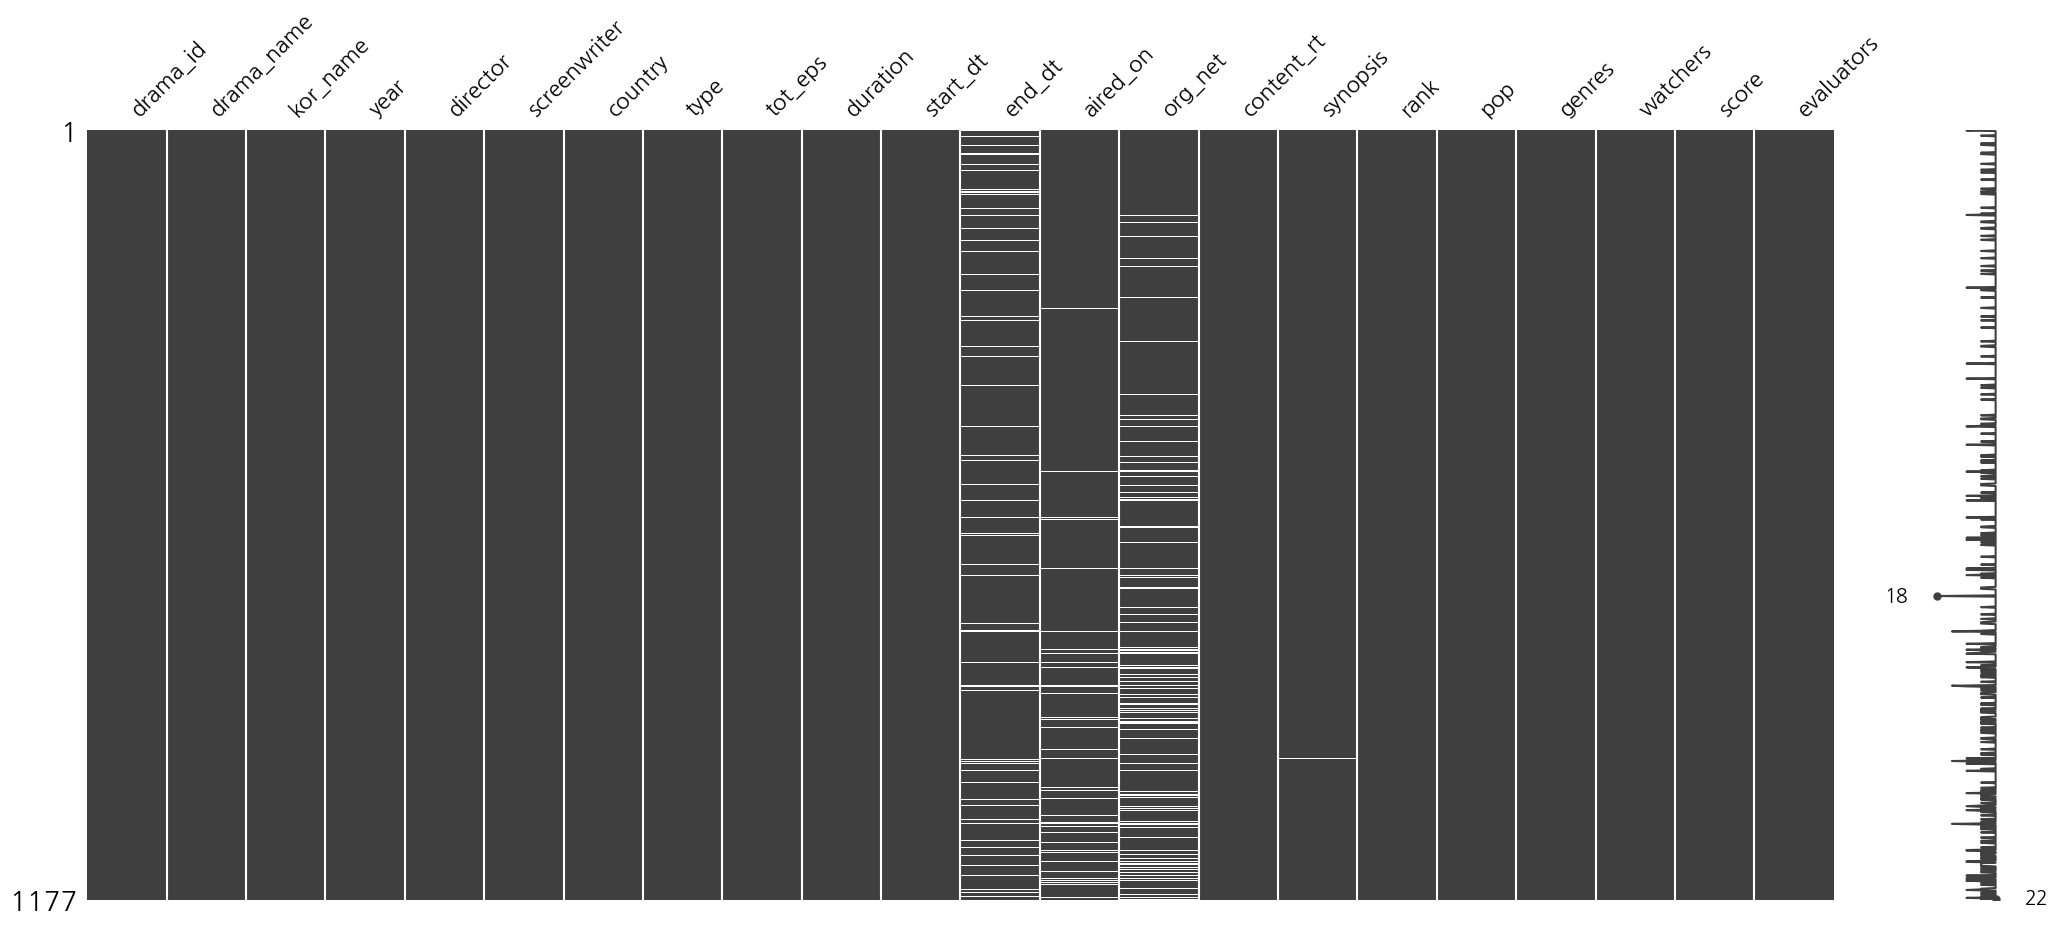

In [6]:
missingno.matrix(drama_df)

<Axes: >

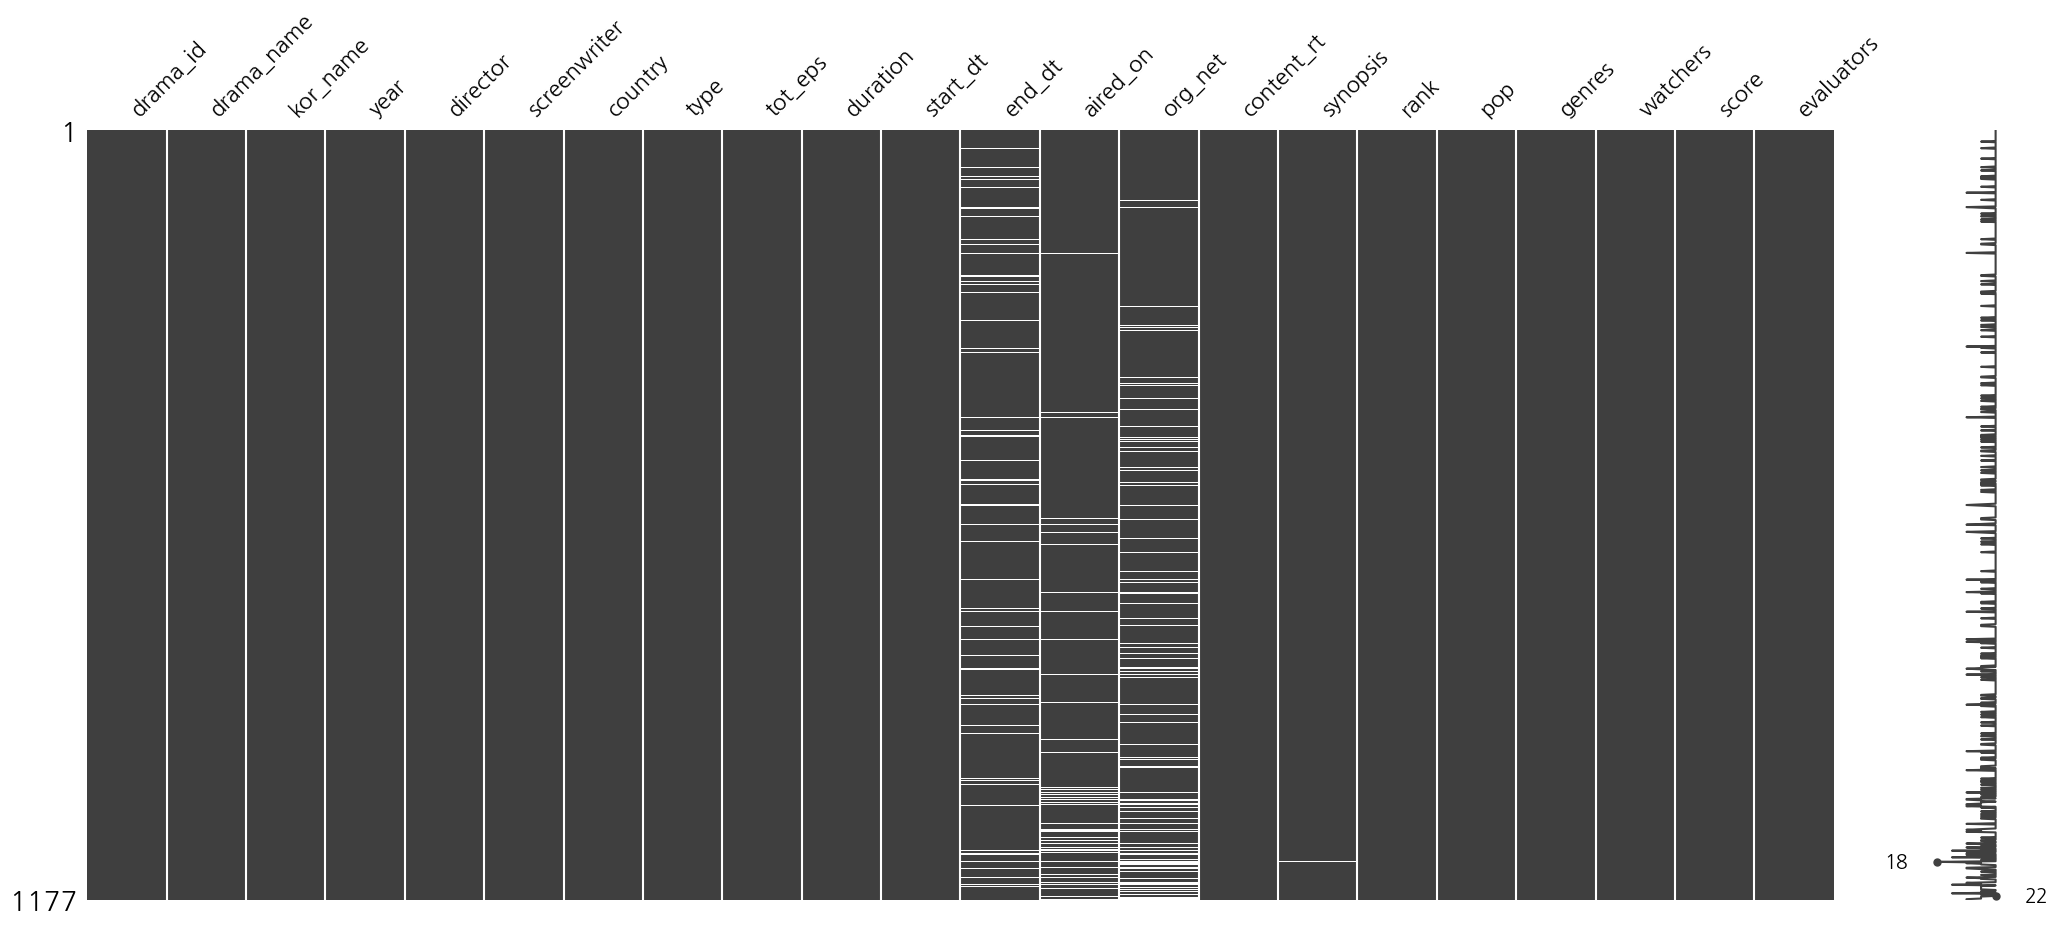

In [7]:
missingno.matrix(drama_df.sort_values(by='pop'))

In [8]:
drama_df.loc[(drama_df['director'].isna()) & (drama_df['screenwriter'].isna()), ['drama_name', 'director', 'screenwriter', 'pop']].sort_values(by='pop')

,drama_name,director,screenwriter,pop


# 작가별 드라마 수

In [9]:
import ast

In [10]:
def func_count_writer(df):

    count_writer_dic = {}
    for lst in df.values:
        if isinstance(lst, float):
            continue
        for writer in ast.literal_eval(str(lst)):
            try:
                count_writer_dic[writer] += 1
            except:
                count_writer_dic[writer] = 1

    count_writer_dic = dict(sorted(count_writer_dic.items(), key=lambda x:x[1], reverse=True))
    return pd.Series(count_writer_dic)

count_writer_series = func_count_writer(drama_df['screenwriter'])
count_writer_series

Park Sun Jae      11
Kim Eun Hee        8
Lee Seul           7
Kim Eun Sook       6
Kim Soo Jin        6
                  ..
Kang Soo Yeon      1
Wei Jun            1
Park Jung Yoon     1
Jang Ah Mi         1
Kim Mi Jung        1
Length: 658, dtype: int64

In [11]:
sum(count_writer_series.values[20:]), sum(count_writer_series.values)

(1027, 1145)

# 작가별 작품수 - 전체 드라마

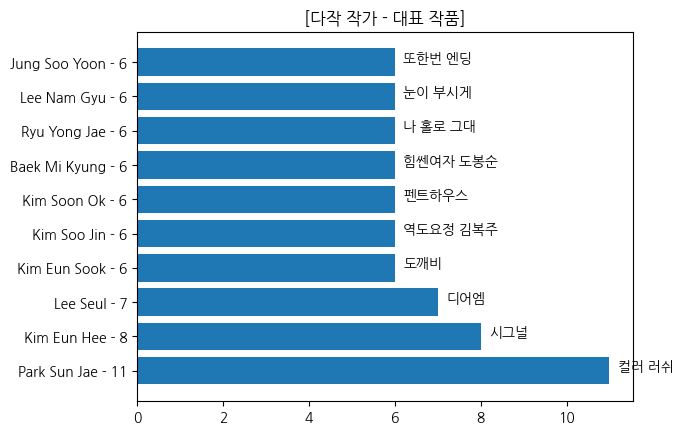

In [12]:
datas = []
labels = []
title_drama = []
for writer, data in count_writer_series[:10].items():
    tmp = drama_df.loc[drama_df['screenwriter'].str.contains(writer)==True]
    datas.append(tmp['drama_name'].count())
    labels.append("%s - %s" %(writer, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[다작 작가 - 대표 작품]")
plt.show();

In [13]:
count_writer_pop100_series = func_count_writer(drama_df.loc[drama_df['pop'] <= 100, 'screenwriter'])
count_writer_pop100_series

Kim Eun Sook      4
Lee Woo Jung      3
Hong Jung Eun     3
Hong Mi Ran       3
Choi Bo Rim       3
                 ..
Jung Won          1
Kim Nam Hee       1
Jung Yoon Jung    1
Lee Ah Yeon       1
Seo Bo Ra         1
Length: 80, dtype: int64

# 작가별 작품수 - 인기순위 100위 이내 작품

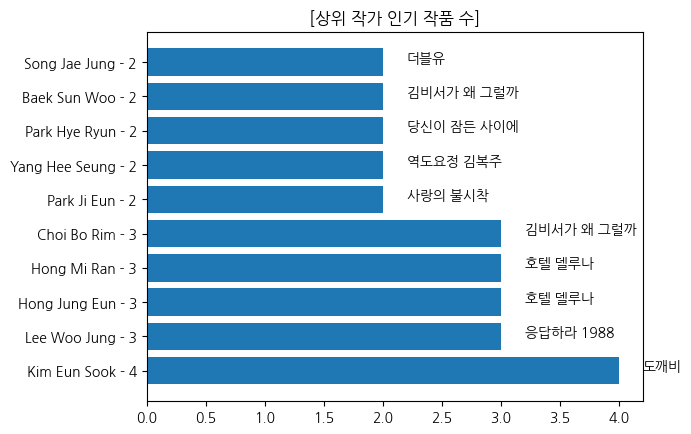

In [14]:
datas = []
labels = []
title_drama = []
for writer, data in count_writer_pop100_series[:10].items():
    tmp = drama_df.loc[(drama_df['screenwriter'].str.contains(writer)==True) & (drama_df['pop'] <= 100)]
    datas.append(tmp['drama_name'].count())
    labels.append("%s - %s" %(writer, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[상위 작가 인기 작품 수]")
plt.show();

In [15]:
drama_df.loc[drama_df['screenwriter'].str.contains("Kim Eun Sook")==True, ['drama_name', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,screenwriter,pop,kor_name,watchers
10,The Glory Part 2,['Kim Eun Sook'],176,더글로리 파트 2,48798
22,The Glory,['Kim Eun Sook'],98,더 글로리,68636
26,Mr. Sunshine,['Kim Eun Sook'],106,미스터 션샤인,66873
31,Goblin,['Kim Eun Sook'],1,도깨비,209376
78,Descendants of the Sun,"['Kim Eun Sook','Kim Won Seok']",4,태양의 후예,175935
317,The King: Eternal Monarch,['Kim Eun Sook'],43,더 킹,93253


In [16]:
drama_df.loc[drama_df['screenwriter'].str.contains("Hong Jung Eun")==True, ['drama_name', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,screenwriter,pop,kor_name,watchers
6,Alchemy of Souls,"['Hong Jung Eun','Hong Mi Ran']",78,환혼,76869
18,Alchemy of Souls Season 2: Light and Shadow,"['Hong Jung Eun','Hong Mi Ran']",191,환혼,46681
80,Hotel del Luna,"['Hong Jung Eun','Hong Mi Ran']",9,호텔 델루나,148196
255,A Korean Odyssey,"['Hong Jung Eun','Hong Mi Ran']",56,화유기,85528
820,Warm and Cozy,"['Hong Jung Eun','Hong Mi Ran']",647,맨도롱 또똣,20197


# 상위 작가들 전체 작품 수와 인기 평균
- 상위 작가들 기준 : pop 100 안에 든 작가 중 상위 10명

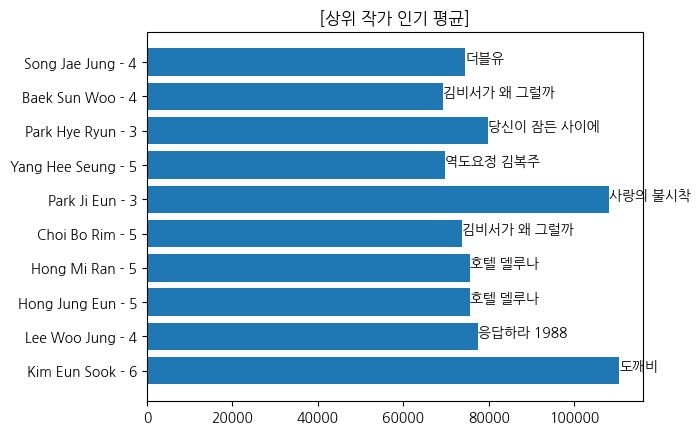

In [17]:
datas = []
labels = []
title_drama = []
for writer in count_writer_pop100_series.index[:10]:
    tmp = drama_df.loc[drama_df['screenwriter'].str.contains(writer)==True]
    datas.append(tmp['watchers'].mean())
    labels.append("%s - %s" %(writer, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[상위 작가 인기 평균]")
plt.show();

In [18]:
drama_df.loc[drama_df['screenwriter'].str.contains("Kim Eun Sook")==True, ['drama_name', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,screenwriter,pop,kor_name,watchers
10,The Glory Part 2,['Kim Eun Sook'],176,더글로리 파트 2,48798
22,The Glory,['Kim Eun Sook'],98,더 글로리,68636
26,Mr. Sunshine,['Kim Eun Sook'],106,미스터 션샤인,66873
31,Goblin,['Kim Eun Sook'],1,도깨비,209376
78,Descendants of the Sun,"['Kim Eun Sook','Kim Won Seok']",4,태양의 후예,175935
317,The King: Eternal Monarch,['Kim Eun Sook'],43,더 킹,93253


# 디렉터별 드라마 수

In [19]:
def func_count_director(df):
    count_director_dic = {}
    for lst in df.values:
        if isinstance(lst, float):
            continue
        for writer in ast.literal_eval(str(lst)):
            try:
                count_director_dic[writer] += 1
            except:
                count_director_dic[writer] = 1

    count_director_dic = dict(sorted(count_director_dic.items(), key=lambda x:x[1], reverse=True))
    return pd.Series(count_director_dic)

count_director_series = func_count_director(drama_df['director']).sort_values(ascending=False)
count_director_series

Park Sun Jae      15
Kim Jung Min      10
Song Hyun Wook    10
Ahn Gil Ho         9
Kim Hong Seon      9
                  ..
Park Ho Jin        1
Kim Jee Woon       1
Kim Jong Hyun      1
Lee Dong Hun       1
Kwon Nam Ki        1
Length: 464, dtype: int64

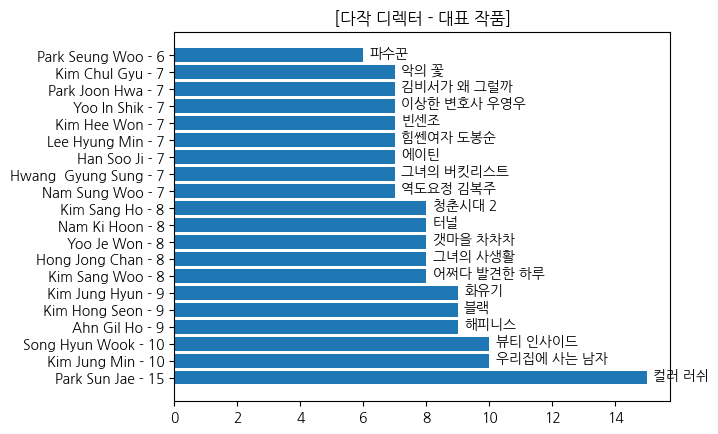

In [20]:
datas = []
labels = []
title_drama = []
for director, data in count_director_series[:20].items():
    tmp = drama_df.loc[drama_df['director'].str.contains(director)==True]
    datas.append(tmp['drama_name'].count())
    labels.append("%s - %s" %(director, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i - 0.1, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[다작 디렉터 - 대표 작품]")
plt.show();

In [21]:
count_director_pop100_series = func_count_writer(drama_df.loc[drama_df['pop'] <= 100, 'director'])
count_director_pop100_series

Park Joon Hwa     5
Yoo Je Won        4
Oh Choong Hwan    4
Baek Sang Hoon    4
Shin Won Ho       3
                 ..
Lee Min Woo       1
Kang Cheol Woo    1
Kim Ga Ram        1
Jang Ji Yeon      1
Lee Yoon Jung     1
Length: 66, dtype: int64

# 인기순위 100위 이내 작품 - 디렉터별 작품수

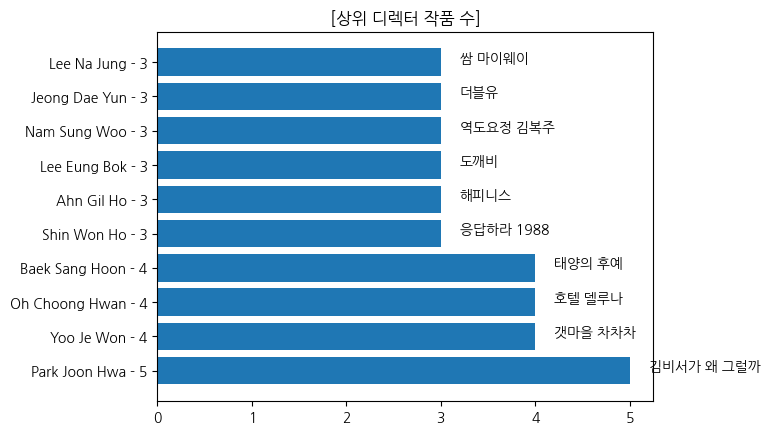

In [22]:
datas = []
labels = []
title_drama = []
for director, data in count_director_pop100_series[:10].items():
    tmp = drama_df.loc[(drama_df['director'].str.contains(director)==True) & (drama_df['pop'] <= 100)]
    datas.append(tmp['drama_name'].count())
    labels.append("%s - %s" %(director, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[상위 디렉터 작품 수]")
plt.show();

In [23]:
drama_df.loc[drama_df['director'].str.contains("Park Joon Hwa")==True, ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
6,Alchemy of Souls,['Park Joon Hwa'],"['Hong Jung Eun','Hong Mi Ran']",78,환혼,76869
18,Alchemy of Souls Season 2: Light and Shadow,"['Park Joon Hwa','Bae Hyun Jin']","['Hong Jung Eun','Hong Mi Ran']",191,환혼,46681
116,What's Wrong with Secretary Kim,['Park Joon Hwa'],"['Baek Sun Woo','Choi Bo Rim']",5,김비서가 왜 그럴까,169739
137,Because This Is My First Life,"['Park Joon Hwa','Nam Sung Woo']",['Yoon Nan Joong'],33,이번 생은 처음이라,101424
233,Touch Your Heart,['Park Joon Hwa'],"['Choi Bo Rim','Lee Myung Sook']",46,진심이 닿다,92004
299,"Bring It On, Ghost",['Park Joon Hwa'],['Lee Dae II'],84,싸우자귀신아,75859
471,Let's Eat Season 2,"['Park Joon Hwa','Choi Kyu Shik']",[],1294,식샤를 합시다 2,10549


In [24]:
drama_df.loc[drama_df['director'].str.contains("Yoo Je Won")==True, ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
51,Hometown Cha-Cha-Cha,['Yoo Je Won'],['Shin Ha Eun'],41,갯마을 차차차,95310
124,"Hi Bye, Mama!",['Yoo Je Won'],"['Kwon Hye Joo','Im Yeon Soo']",255,"하이바이, 마마!",39169
140,Crash Course in Romance,['Yoo Je Won'],['Yang Hee Seung'],229,일타 스캔들,41454
218,Oh My Ghost,['Yoo Je Won'],['Yang Hee Seung'],48,오 나의 귀신님,90682
231,The Smile Has Left Your Eyes,['Yoo Je Won'],['Song Hye Jin'],134,하늘에서 내리는 일억 개의 별,56885
317,The King: Eternal Monarch,"['Baek Sang Hoon','Yoo Je Won','Jung Ji Hyun']",['Kim Eun Sook'],43,더 킹,93253
394,Tomorrow With You,['Yoo Je Won'],['Heo Sung Hye'],213,내일 그대와,43786
518,Abyss,['Yoo Je Won'],['Moon Soo Yeon'],68,어비스,81310


In [25]:
drama_df.loc[drama_df['director'].str.contains("Oh Choong Hwan")==True, ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
60,While You Were Sleeping,"['Oh Choong Hwan','Park Soo Jin']",['Park Hye Ryun'],11,당신이 잠든 사이에,147389
80,Hotel del Luna,['Oh Choong Hwan'],"['Hong Jung Eun','Hong Mi Ran']",9,호텔 델루나,148196
98,Big Mouth,"['Oh Choong Hwan','Bae Hyun Jin']","['Jang Young Chul','Jung Kyung Soon']",164,빅마우스,51596
308,Start-Up,['Oh Choong Hwan'],['Park Hye Ryun'],51,스타트업,89594
495,Doctors,['Oh Choong Hwan'],['Ha Myung Hee'],93,닥터스,71215


In [26]:
drama_df.loc[drama_df['director'].str.contains("Baek Sang Hoon")==True, ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
78,Descendants of the Sun,"['Baek Sang Hoon','Lee Eung Bok']","['Kim Eun Sook','Kim Won Seok']",4,태양의 후예,175935
248,Love in the Moonlight,"['Baek Sang Hoon','Kim Seong Yoon']","['Im Ye Jin','Kim Min Jung']",81,구르미 그린 달빛,76224
260,Who Are You: School 2015,"['Baek Sang Hoon','Kim Seong Yoon']","['Kim Hyun Jung','Im Ye Jin','Kim Min Jung']",73,후아유,78378
317,The King: Eternal Monarch,"['Baek Sang Hoon','Yoo Je Won','Jung Ji Hyun']",['Kim Eun Sook'],43,더 킹,93253


# 상위 디렉터들 전체 작품 수와 인기 평균
- 상위 디렉터들 기준 : pop 100 안에 든 디렉터 중 상위 10명

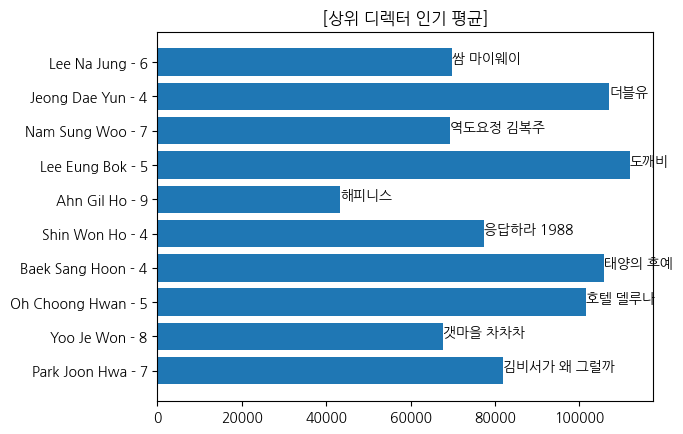

In [27]:
datas = []
labels = []
title_drama = []
for director in count_director_pop100_series.index[:10]:
    tmp = drama_df.loc[drama_df['director'].str.contains(director)==True]
    datas.append(tmp['watchers'].mean())
    labels.append("%s - %s" %(director, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[상위 디렉터 인기 평균]")
plt.show();

# 작가 - 디렉터 시너지
- 두 작품 이상 작업한 분들만 산정

In [28]:
synergy_dic = {}

for director in count_director_pop100_series.index:
    for writer in count_writer_pop100_series.index:
        tmp = drama_df.loc[(drama_df['director'].str.contains(director)==True) & (drama_df['screenwriter'].str.contains(writer)==True)]
        
        tmp_watchers = tmp['watchers']
        if len(tmp_watchers) == 0:
            continue

        tmp_dramas = tmp['drama_name'].count()
        if tmp_dramas <= 1:
            continue
        
        title_name = tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0]
        try:
            synergy_dic[director].append((tmp_watchers.mean(), writer, tmp_dramas, title_name))
        except:
            synergy_dic[director] = [(tmp_watchers.mean(), writer, tmp_dramas, title_name)]
        synergy_dic[director] = max(synergy_dic[director])

synergy_dic = dict(sorted(synergy_dic.items(), key=lambda x:x[1], reverse=True))
synergy_dic


{'Lee Eung Bok': (150728.0, 'Kim Eun Sook', 3, '도깨비'),
 'Park Joon Hwa': (130871.5, 'Choi Bo Rim', 2, '김비서가 왜 그럴까'),
 'Oh Choong Hwan': (118491.5, 'Park Hye Ryun', 2, '당신이 잠든 사이에'),
 'Lee Hyung Min': (100593.5, 'Baek Mi Kyung', 2, '힘쎈여자 도봉순'),
 'Shin Won Ho': (77404.75, 'Lee Woo Jung', 4, '응답하라 1988'),
 'Baek Sang Hoon': (77301.0, 'Kim Min Jung', 2, '후아유'),
 'Lee Na Jung': (73156.5, 'Seo Bo Ra', 2, '좋아하면 울리는'),
 'Jung Ji Hyun': (68618.5, 'Kwon Do Eun', 2, '스물다섯 스물하나'),
 'Kim Seong Yoon': (66971.33333333333, 'Kim Min Jung', 3, '후아유'),
 'Yoo Je Won': (66068.0, 'Yang Hee Seung', 2, '오 나의 귀신님'),
 'Lee Jeong Hyo': (56654.5, 'Jung Hyun Jung', 2, '로맨스는 별책부록'),
 'Jo Nam Hyung': (56341.5, 'Han Woo Ri', 2, '구미호뎐'),
 'Yoo Seon Dong': (55032.0, 'Yeo Ji Na', 2, '경이로운 소문'),
 'Park Hong Kyun': (52862.5, 'Hong Mi Ran', 2, '화유기'),
 'Kim Sung Ho': (51743.0, 'Kim Eun Hee', 2, '킹덤'),
 'Lee Jae Hoon': (42473.0, 'Park Jae Bum', 2, '블러드'),
 'Ahn Gil Ho': (42321.0, 'Han Sang Woon', 2, '해피니스'),
 'Kang Shin Hyo

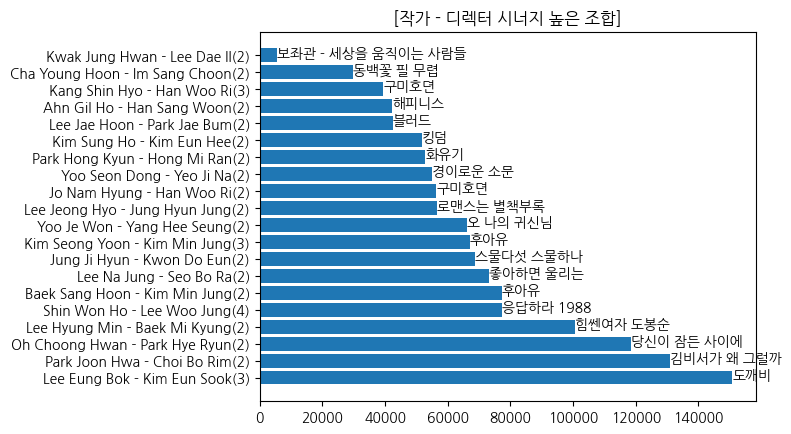

In [29]:
datas = []
labels = []
title_drama = []
for director, tp in synergy_dic.items():
    value, writer, dramas, title_name = tp
    datas.append(value)
    labels.append("%s - %s(%s)" %(director, writer, dramas))
    title_drama.append(title_name)

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i - 0.1, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[작가 - 디렉터 시너지 높은 조합]")
plt.show();

In [30]:
drama_df.loc[(drama_df['director'].str.contains("Lee Eung Bok")==True) & (drama_df['screenwriter'].str.contains("Kim Eun Sook")==True), ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
26,Mr. Sunshine,['Lee Eung Bok'],['Kim Eun Sook'],106,미스터 션샤인,66873
31,Goblin,['Lee Eung Bok'],['Kim Eun Sook'],1,도깨비,209376
78,Descendants of the Sun,"['Baek Sang Hoon','Lee Eung Bok']","['Kim Eun Sook','Kim Won Seok']",4,태양의 후예,175935


In [31]:
drama_df.loc[(drama_df['director'].str.contains("Baek Sang Hoon")==True) & (drama_df['screenwriter'].str.contains("Kim Eun Sook")==True), ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
78,Descendants of the Sun,"['Baek Sang Hoon','Lee Eung Bok']","['Kim Eun Sook','Kim Won Seok']",4,태양의 후예,175935
317,The King: Eternal Monarch,"['Baek Sang Hoon','Yoo Je Won','Jung Ji Hyun']",['Kim Eun Sook'],43,더 킹,93253


In [32]:
drama_df.loc[(drama_df['director'].str.contains("Oh Choong Hwan")==True) & (drama_df['screenwriter'].str.contains("Park Hye Ryun")==True), ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
60,While You Were Sleeping,"['Oh Choong Hwan','Park Soo Jin']",['Park Hye Ryun'],11,당신이 잠든 사이에,147389
308,Start-Up,['Oh Choong Hwan'],['Park Hye Ryun'],51,스타트업,89594


In [33]:
drama_df.loc[(drama_df['director'].str.contains("Lee Hyung Min")==True) & (drama_df['screenwriter'].str.contains("Baek Mi Kyung")==True), ['drama_name', 'director', 'screenwriter', 'pop', 'kor_name', 'watchers']]

,drama_name,director,screenwriter,pop,kor_name,watchers
67,Strong Woman Do Bong Soon,['Lee Hyung Min'],['Baek Mi Kyung'],2,힘쎈여자 도봉순,195093
383,Miracle That We Met,"['Lee Hyung Min','Jo Woong']",['Baek Mi Kyung'],2105,우리가 만난 기적,6094


# 배우별 드라마 수

# 장르 카운트

In [34]:
count_genres_dic = {}
for lst in drama_df['genres'].values:
    for genre in str(lst).replace('\xa0', ' ').split(","):
        try:
            count_genres_dic[genre.strip()] += 1
        except:
            count_genres_dic[genre.strip()] = 1

count_genres_dic = dict(sorted(count_genres_dic.items(), key=lambda x:x[1], reverse=True))
count_genres_dic

{'Romance': 800,
 'Drama': 661,
 'Comedy': 488,
 'Mystery': 290,
 'Thriller': 220,
 'Youth': 204,
 'Life': 193,
 'Melodrama': 185,
 'Fantasy': 132,
 'Action': 115,
 'Supernatural': 90,
 'Business': 80,
 'Historical': 71,
 'Law': 65,
 'Crime': 52,
 'Psychological': 50,
 'Music': 48,
 'Sci-Fi': 46,
 'Political': 44,
 'Family': 43,
 'Medical': 41,
 'Horror': 36,
 'Food': 29,
 'Sports': 17,
 'Sitcom': 12,
 'Adventure': 7,
 'Military': 6,
 'Mature': 2,
 'Documentary': 2,
 'Martial Arts': 2,
 'War': 1}

# Top 100 드라마 장르

In [35]:
count_pop100_genres_dic = {}
for lst in drama_df.loc[drama_df['pop'] <= 100, 'genres'].values:
    for genre in str(lst).replace('\xa0', ' ').split(","):
        try:
            count_pop100_genres_dic[genre.strip()] += 1
        except:
            count_pop100_genres_dic[genre.strip()] = 1

count_pop100_genres_dic = dict(sorted(count_pop100_genres_dic.items(), key=lambda x:x[1], reverse=False))
count_pop100_genres_dic

{'Military': 1,
 'Political': 1,
 'Medical': 2,
 'Sports': 3,
 'Historical': 5,
 'Law': 5,
 'Crime': 6,
 'Supernatural': 6,
 'Horror': 6,
 'Business': 6,
 'Psychological': 7,
 'Sci-Fi': 7,
 'Melodrama': 10,
 'Youth': 10,
 'Mystery': 10,
 'Action': 14,
 'Life': 16,
 'Thriller': 16,
 'Fantasy': 17,
 'Drama': 42,
 'Comedy': 45,
 'Romance': 63}

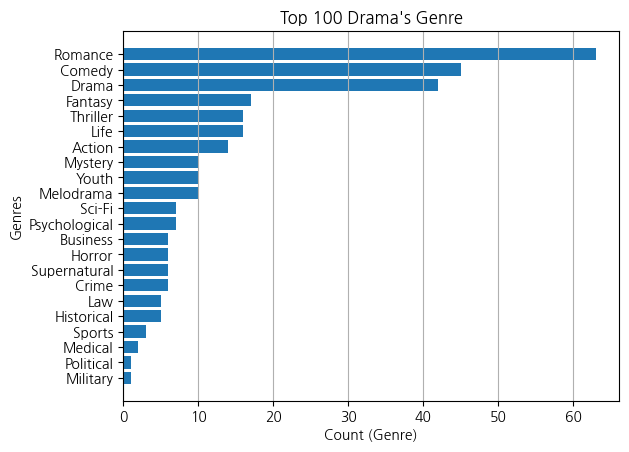

In [36]:
datas = []
labels = []
title_drama = []

drama_pop100_df = drama_df.loc[drama_df['pop']<=100]
for genre, value in count_pop100_genres_dic.items():
    tmp = drama_pop100_df.loc[drama_pop100_df['genres'].str.contains(genre)==True]
    datas.append(value)
    labels.append(genre)
    # title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
# for i in np.arange(len(datas)):
#     ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)
ax.set_xlabel("Count (Genre)")
ax.set_ylabel("Genres")
ax.grid(axis='x')

plt.title("Top 100 Drama's Genre")
plt.show();

# 상위 디렉터 많이 쓴 장르
- 기준 : pop 100등 이내 디렉터 중 watchers의 평균이 큰 순

In [37]:
director_drama_dic = {}
genre_list = []

for director in count_director_pop100_series[:8].index:
    director_drama_dic[director] = {}
    for genre in count_genres_dic.keys():
        tmp = drama_df.loc[(drama_df['director'].str.contains(director)==True) & (drama_df['genres'].str.contains(genre)==True)]

        tmp_dramas = tmp['drama_name'].count()
        if tmp_dramas <= 1:
            continue

        director_drama_dic[director][genre] = tmp_dramas
        genre_list.append(genre)

genre_list = list(set(genre_list))
director_drama_dic


{'Park Joon Hwa': {'Romance': 7,
  'Drama': 3,
  'Comedy': 5,
  'Fantasy': 2,
  'Action': 2,
  'Historical': 2},
 'Yoo Je Won': {'Romance': 7,
  'Drama': 5,
  'Comedy': 4,
  'Mystery': 4,
  'Thriller': 3,
  'Melodrama': 2,
  'Supernatural': 3},
 'Oh Choong Hwan': {'Romance': 4,
  'Drama': 3,
  'Comedy': 3,
  'Mystery': 2,
  'Fantasy': 2},
 'Baek Sang Hoon': {'Romance': 4, 'Drama': 3, 'Comedy': 2, 'Mystery': 2},
 'Shin Won Ho': {'Romance': 3,
  'Drama': 3,
  'Comedy': 2,
  'Life': 4,
  'Medical': 2},
 'Ahn Gil Ho': {'Romance': 3,
  'Drama': 6,
  'Mystery': 3,
  'Thriller': 6,
  'Melodrama': 3,
  'Action': 3,
  'Sci-Fi': 2},
 'Lee Eung Bok': {'Romance': 3,
  'Drama': 2,
  'Comedy': 2,
  'Melodrama': 3,
  'Fantasy': 2,
  'Action': 2},
 'Nam Sung Woo': {'Romance': 5,
  'Drama': 4,
  'Comedy': 6,
  'Life': 3,
  'Business': 2}}

In [38]:
radar_data = []

for director, item in director_drama_dic.items():
    tmp = np.zeros(len(genre_list))

    for i, genre in enumerate(genre_list):
        cnt = director_drama_dic[director].get(genre)
        if cnt==None:
            continue
        tmp[i] = cnt
    radar_data.append((director, [tmp]))

radar_data

[('Park Joon Hwa',
  [array([0., 0., 0., 0., 5., 7., 2., 2., 2., 0., 0., 3., 0., 0.])]),
 ('Yoo Je Won',
  [array([0., 0., 3., 2., 4., 7., 0., 0., 0., 0., 0., 5., 3., 4.])]),
 ('Oh Choong Hwan',
  [array([0., 0., 0., 0., 3., 4., 0., 2., 0., 0., 0., 3., 0., 2.])]),
 ('Baek Sang Hoon',
  [array([0., 0., 0., 0., 2., 4., 0., 0., 0., 0., 0., 3., 0., 2.])]),
 ('Shin Won Ho',
  [array([0., 0., 0., 0., 2., 3., 0., 0., 0., 4., 2., 3., 0., 0.])]),
 ('Ahn Gil Ho',
  [array([2., 0., 6., 3., 0., 3., 0., 0., 3., 0., 0., 6., 0., 3.])]),
 ('Lee Eung Bok',
  [array([0., 0., 0., 3., 2., 3., 0., 2., 2., 0., 0., 2., 0., 0.])]),
 ('Nam Sung Woo',
  [array([0., 2., 0., 0., 6., 5., 0., 0., 0., 3., 0., 4., 0., 0.])])]

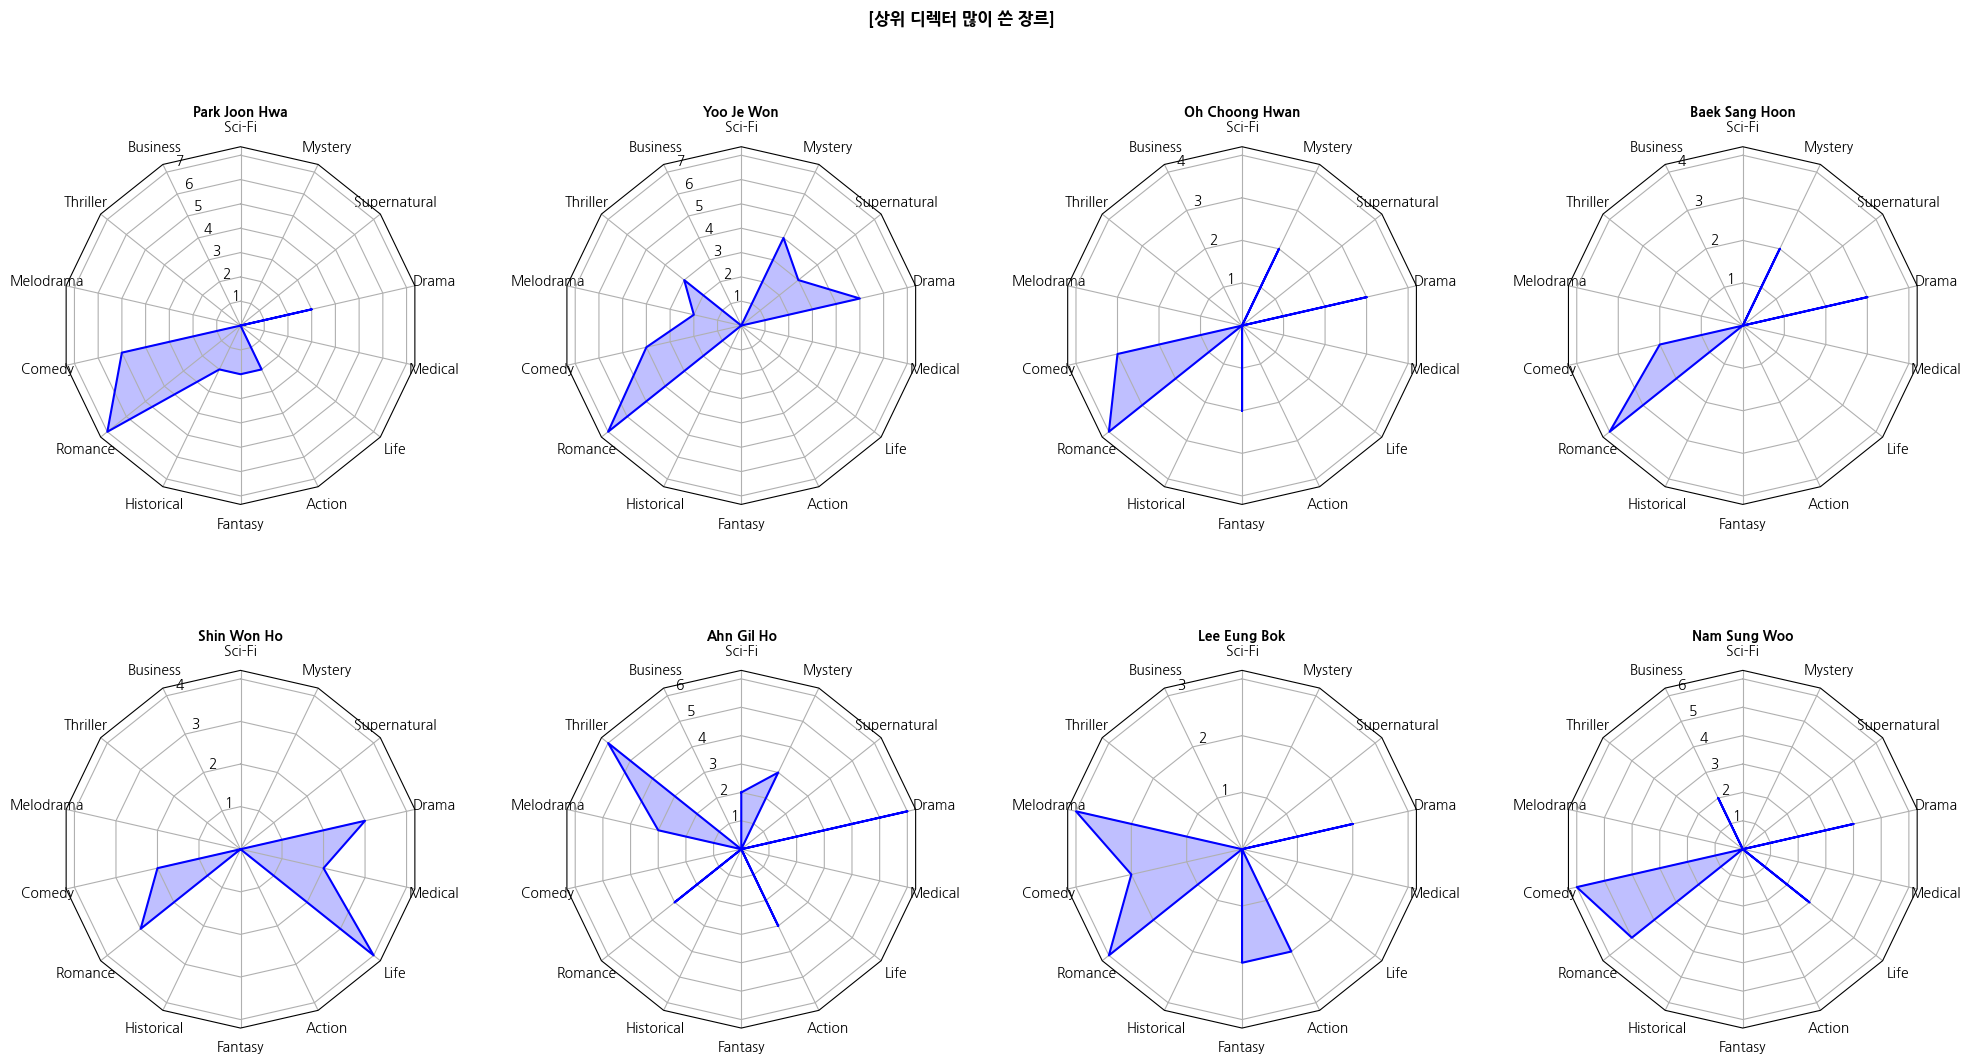

In [39]:
from radar_chart import radar_factory
import koreanize_matplotlib

N = len(genre_list)
theta = radar_factory(N, frame='polygon')

data = radar_data
spoke_labels = genre_list

fig, axs = plt.subplots(figsize=(24, 12), nrows=2, ncols=4,
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.4, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axs.flat, data):
    ax.set_rgrids([1, 2, 3, 4, 5, 6, 7])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                    horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

fig.text(0.5, 0.92, '[상위 디렉터 많이 쓴 장르]',
            horizontalalignment='center', color='black', weight='bold',
            size='large')
plt.show()

# 상위 작가 많이 쓴 장르
- 기준 : pop 100등 이내 디렉터 중 watchers의 평균이 큰 순

In [40]:
writer_drama_dic = {}
genre_list = []

for writer in count_writer_pop100_series[:8].index:
    writer_drama_dic[writer] = {}
    for genre in count_genres_dic.keys():
        tmp = drama_df.loc[(drama_df['screenwriter'].str.contains(writer)==True) & (drama_df['genres'].str.contains(genre)==True)]

        tmp_dramas = tmp['drama_name'].count()
        if tmp_dramas <= 1:
            continue

        writer_drama_dic[writer][genre] = tmp_dramas
        genre_list.append(genre)

genre_list = list(set(genre_list))
writer_drama_dic


{'Kim Eun Sook': {'Romance': 4,
  'Drama': 3,
  'Comedy': 2,
  'Thriller': 2,
  'Melodrama': 5},
 'Lee Woo Jung': {'Romance': 3,
  'Drama': 3,
  'Comedy': 2,
  'Life': 4,
  'Medical': 2},
 'Hong Jung Eun': {'Romance': 5,
  'Comedy': 3,
  'Fantasy': 4,
  'Action': 2,
  'Historical': 2,
  'Horror': 2},
 'Hong Mi Ran': {'Romance': 5,
  'Comedy': 3,
  'Fantasy': 4,
  'Action': 2,
  'Historical': 2,
  'Horror': 2},
 'Choi Bo Rim': {'Romance': 5, 'Drama': 2, 'Comedy': 4},
 'Park Ji Eun': {'Romance': 3, 'Drama': 2, 'Comedy': 3},
 'Yang Hee Seung': {'Romance': 5,
  'Drama': 2,
  'Comedy': 5,
  'Thriller': 2,
  'Life': 2},
 'Park Hye Ryun': {'Romance': 3, 'Comedy': 2, 'Business': 2}}

In [41]:
radar_data = []

for writer, item in writer_drama_dic.items():
    tmp = np.zeros(len(genre_list))

    for i, genre in enumerate(genre_list):
        cnt = writer_drama_dic[writer].get(genre)
        if cnt==None:
            continue
        tmp[i] = cnt
    radar_data.append((writer, [tmp]))

radar_data

[('Kim Eun Sook', [array([0., 0., 2., 5., 2., 4., 0., 0., 0., 0., 0., 3.])]),
 ('Lee Woo Jung', [array([0., 0., 0., 0., 2., 3., 0., 0., 4., 2., 0., 3.])]),
 ('Hong Jung Eun', [array([2., 0., 0., 0., 3., 5., 2., 2., 0., 0., 4., 0.])]),
 ('Hong Mi Ran', [array([2., 0., 0., 0., 3., 5., 2., 2., 0., 0., 4., 0.])]),
 ('Choi Bo Rim', [array([0., 0., 0., 0., 4., 5., 0., 0., 0., 0., 0., 2.])]),
 ('Park Ji Eun', [array([0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 2.])]),
 ('Yang Hee Seung', [array([0., 0., 2., 0., 5., 5., 0., 0., 2., 0., 0., 2.])]),
 ('Park Hye Ryun', [array([0., 2., 0., 0., 2., 3., 0., 0., 0., 0., 0., 0.])])]

In [42]:
len(genre_list), len(radar_data[0][1][0])

(12, 12)

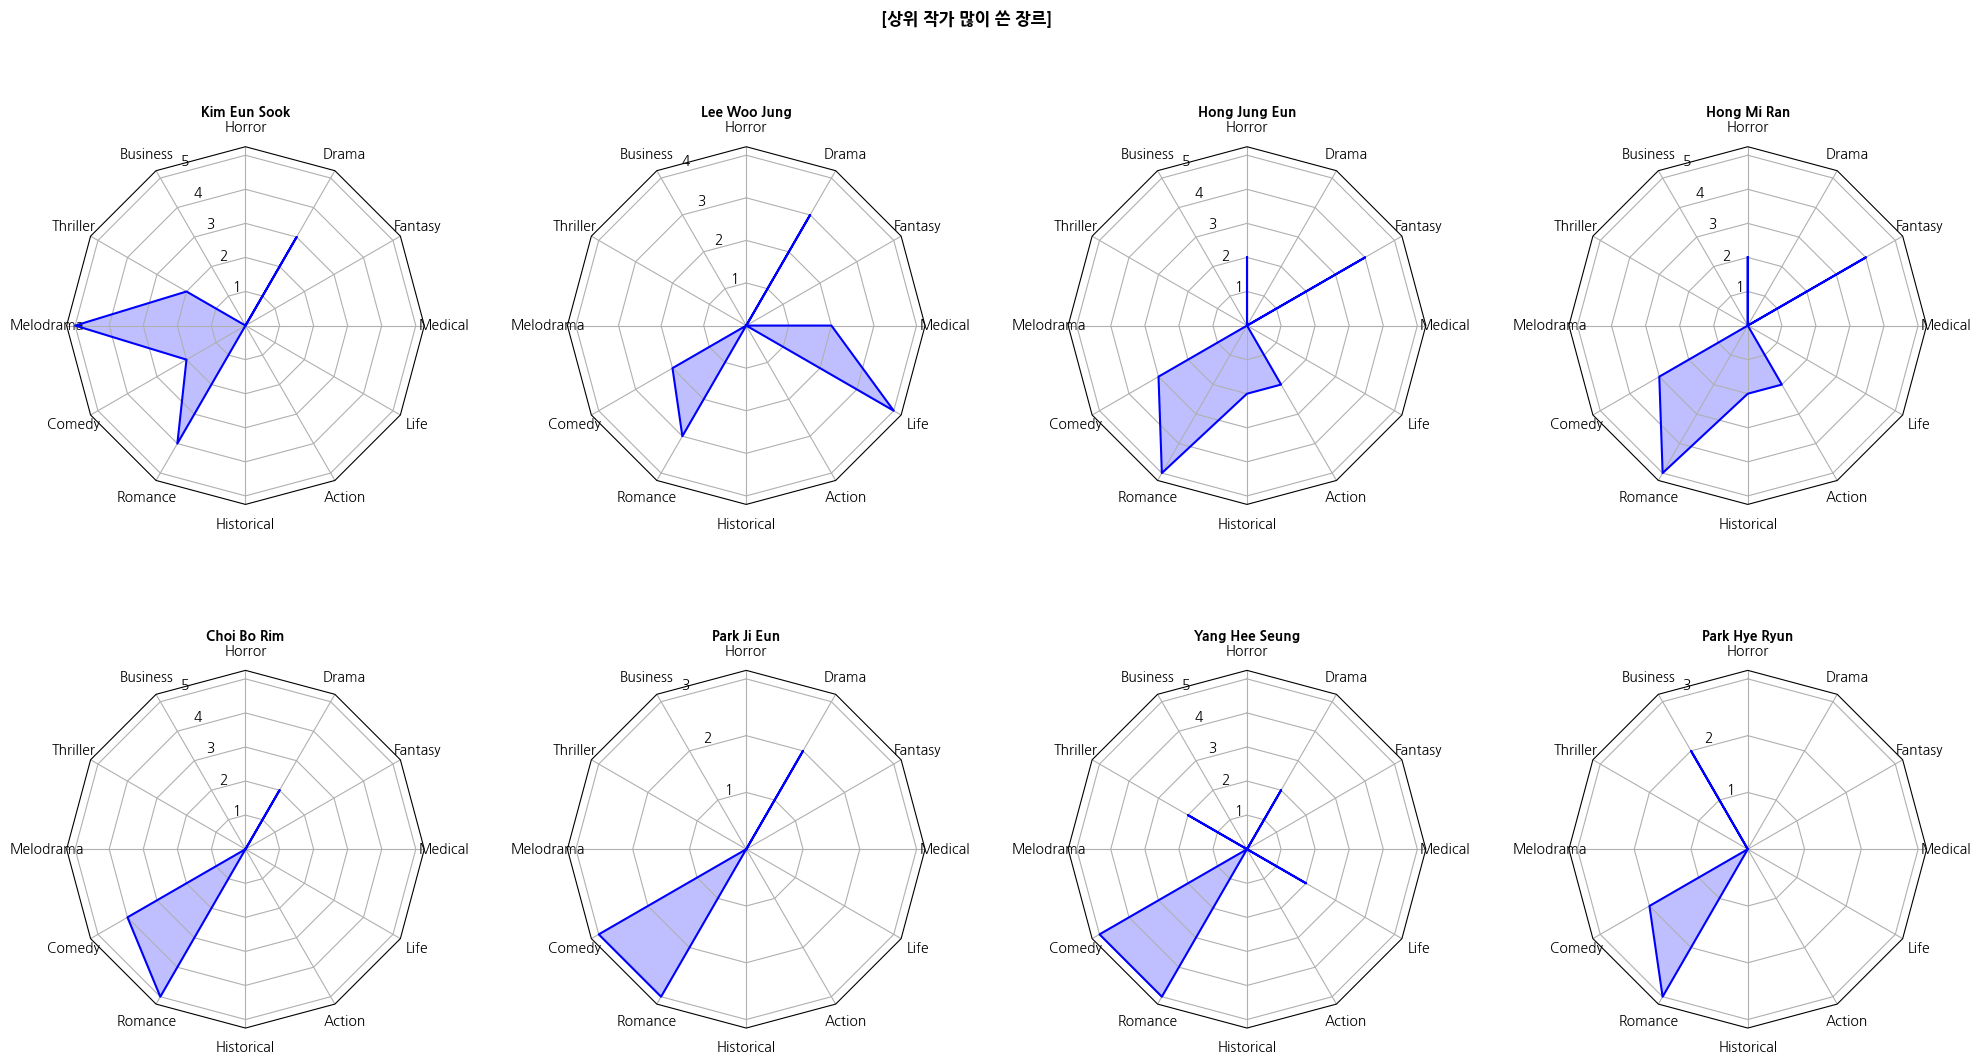

In [44]:
from radar_chart import radar_factory
import koreanize_matplotlib

N = len(genre_list)
theta = radar_factory(N, frame='polygon')

data = radar_data
spoke_labels = genre_list

fig, axs = plt.subplots(figsize=(24, 12), nrows=2, ncols=4,
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.4, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axs.flat, data):
    ax.set_rgrids([1, 2, 3, 4, 5, 6, 7])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                    horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)


fig.text(0.5, 0.92, '[상위 작가 많이 쓴 장르]',
            horizontalalignment='center', color='black', weight='bold',
            size='large')
plt.show()

# 요일별 watchers 평균

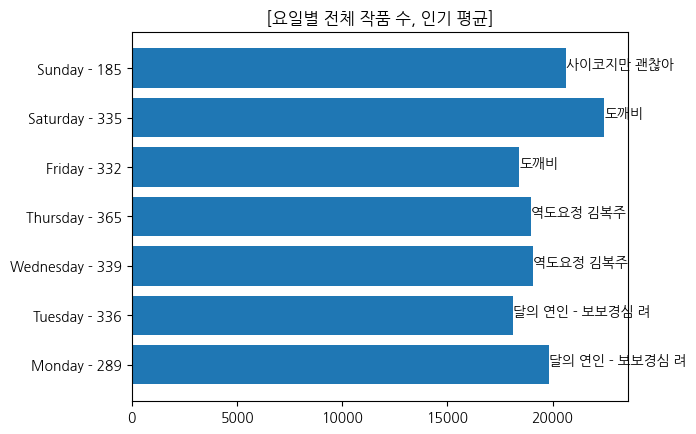

In [45]:
datas = []
labels = []
title_drama = []
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for weekday in weekday_list:
    tmp = drama_df.loc[drama_df['aired_on'].str.contains(weekday)==True]
    datas.append(tmp['watchers'].mean())
    labels.append("%s - %s" %(weekday, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[요일별 전체 작품 수, 인기 평균]")
plt.show();

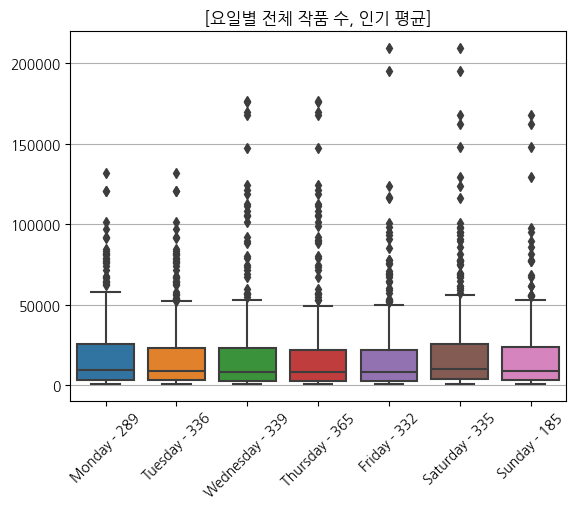

In [46]:
datas = []
labels = []
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for weekday in weekday_list:
    tmp = drama_df.loc[(drama_df['aired_on'].str.contains(weekday)==True) & (drama_df['watchers'] >= 100)]
    datas.append(tmp['watchers'])
    labels.append("%s - %s" %(weekday, tmp['drama_name'].count()))

fig, ax = plt.subplots()
# for weekday in weekday_list:
#     tmp = drama_df.loc[(drama_df['aired_on'].str.contains(weekday)==True) & (drama_df['pop'] <= 100)]
# ax.boxplot(datas)
ax = sns.boxplot(datas)
# ax.bar(np.arange(len(datas)), datas)
ax.set_xticks(np.arange(len(datas)), labels, rotation=45)
# ax.set_ylim(50000, 220000)

plt.grid(axis='y')
plt.title("[요일별 전체 작품 수, 인기 평균]")
plt.show();

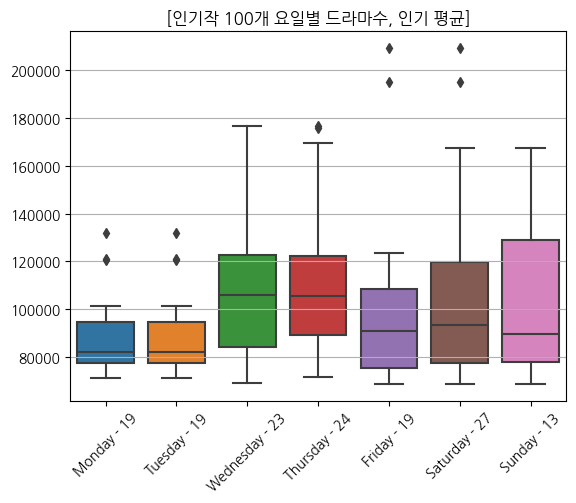

In [47]:
datas = []
labels = []
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for weekday in weekday_list:
    tmp = drama_df.loc[(drama_df['aired_on'].str.contains(weekday)==True) & (drama_df['pop'] <= 100)]
    datas.append(tmp['watchers'])
    labels.append("%s - %s" %(weekday, tmp['drama_name'].count()))

fig, ax = plt.subplots()

ax = sns.boxplot(datas)
ax.set_xticks(np.arange(len(datas)), labels, rotation=45)

plt.grid(axis='y')
plt.title("[인기작 100개 요일별 드라마수, 인기 평균]")
plt.show();

In [48]:
drama_df.loc[(drama_df['aired_on'].str.contains('Friday')==True) & (drama_df['aired_on'].str.contains('Saturday')==True) & (drama_df['pop'] <= 100), ['drama_name', 'kor_name', 'watchers', 'pop']].sort_values(by='pop').iloc[:2]

,drama_name,kor_name,watchers,pop
31,Goblin,도깨비,209376,1
67,Strong Woman Do Bong Soon,힘쎈여자 도봉순,195093,2


# 년도별 watchers 분포

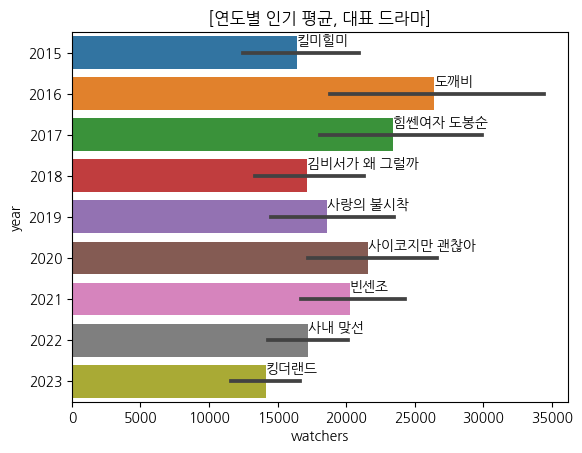

In [49]:
datas = []
labels = []
title_drama = []
for year in sorted(drama_df['year'].unique()):
    tmp = drama_df.loc[drama_df['year']==year]
    datas.append(tmp['watchers'].mean())
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])


fig, ax = plt.subplots()
sns.barplot(data=drama_df, x='watchers', y='year', estimator="mean", ax=ax, orient='h')
for i in np.arange(len(datas)):
    ax.text(datas[i], i-0.2, title_drama[i])

plt.title("[연도별 인기 평균, 대표 드라마]")
plt.show();

<Axes: xlabel='year', ylabel='watchers'>

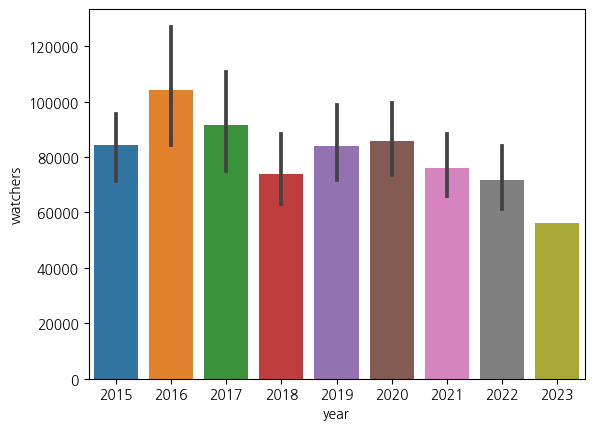

In [50]:
sns.barplot(data=drama_df.loc[drama_df['watchers']>=50000], x='year', y='watchers', estimator="mean")

# 장르별 인기 평군, 대표 드라마

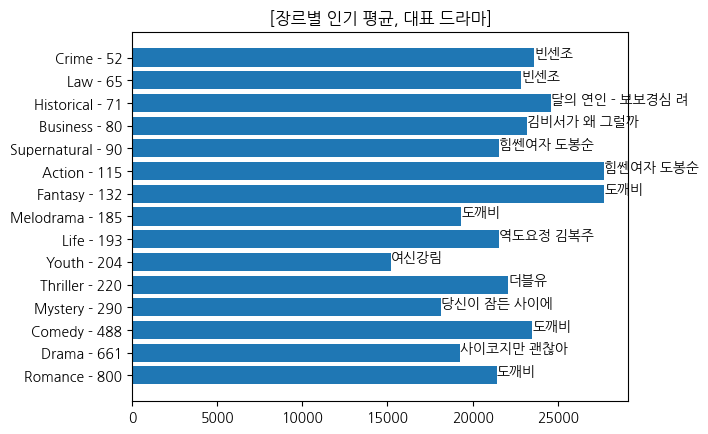

In [51]:
datas = []
labels = []
title_drama = []
for genre in list(count_genres_dic.keys())[:15]:
    tmp = drama_df.loc[drama_df['genres'].str.contains(genre)==True]
    datas.append(tmp['watchers'].mean())
    labels.append("%s - %s" %(genre, tmp['drama_name'].count()))
    title_drama.append(tmp.loc[tmp['watchers'] == tmp['watchers'].max(), 'kor_name'].values[0])

fig, ax = plt.subplots()
ax.barh(np.arange(len(datas)), datas)
for i in np.arange(len(datas)):
    ax.text(datas[i] + 0.2, i, title_drama[i])
ax.set_yticks(np.arange(len(datas)), labels)

plt.title("[장르별 인기 평균, 대표 드라마]")
plt.show();